# Persistent Homology: Bar Codes and Examples

In the previous notebook, we showed how given a set of data points, points are interpreted as vertices of a graph, where every vertex is given a neighborhood, which when growing is making simplices appear to finally obtain a complex, whose homology groups can be computed depending on the neighborhood.

1. We put all these ingredients obtained so far to construct "bar codes".
2. We look at some examples.

Some references:
* https://jeremykun.com/2013/04/10/computing-homology/
A blog with some explicit computations.
* http://www.maths.ed.ac.uk/~aar/papers/edelhare.pdf
A survey paper which also describes other types of homology suited for data analysis. The reduction of the combined boundary matrix used below is from this paper.
* https://arxiv.org/pdf/1506.08903.pdf
A recent survey paper, discussing computational issues and comparing existing tools.
The discussion below on bar codes uses this paper.

# Bar Codes

Given a simplicial complex $K$, a **filtered simplicial complex** is a sequence $K_1 \subset K_2 \subset \ldots \subset K_l = K$ of nested subcomplexes of $K$, here it is generated as a function of $\epsilon$, where $\epsilon$ starts from $0$ and increases. For each of these $K_i$, the homology groups $H_n(K_i)$ can be computed. 
Now we are interested in how $H_n(K_i)$ varies with $i$ (and thus with $\epsilon$).
It turns out that the inclusions maps $K_i \rightarrow K_j$ induce linear maps 
$f_{i,j}: H_n(K_i) \rightarrow H_n(K_j)$ with $i \leq j$, and by functoriality, 
$f_{k,j}\circ f_{i,k} = f_{i,j}$ for all $i \leq k \leq j$.
This allows to define  the **nth persistent homology** of $K$ as the pair
$(\left\{H_n(K_i)\right\}_i, \left\{f_{i,j} \right\}_{i,j})$.

The $n$th persistent homology of a filtered simplicial complex allows to define bar codes.
For each $H_n(K_i)$, we (vertically) draw bullets representing each of its generators (there are thus as many bullets as the dimension of $H_n(K_i)$). 
At this step, we can visualize a 2-dimensional plot, with $i$ on the $x$-axis, and for each $i$, vertically, we have bullets for each generator. Then we draw lines to connect one generator $u$ of $H_n(K_i)$ to one generator $v$ of $H_n(K_{i+1})$ if the former is sent by $f_{i,{i+1}}$ to the latter. If $f_{i,{i+1}}(u)=0$, the line ends at $i+1$.
Such a representation depends on the choice of a basis, and a bad choice of basis may make the drawing unreadable. It was showed by Zomorodian and Carlsson that there exists a choice of basis vectors such that we obtain a unique collection of disjoint half-open intervals, called a **bar code**. Note that this results relies on coefficients in a field (and in particular, $\mathbb{F}_2$ is enough for computing bar codes).

Bar codes are interpreted in terms of births and deaths of generators. 
We say that $x \in H_n(K_i)$, $x\neq 0$, is born in $H_n(K_i)$ if it is not in the image 
of $f_{i-1,i}$, and $x$ dies in $H_n(K_j)$ if $j>i$ is the smallest index for which $f_{i,j}(x)=0$. The lifetime of $x$ is thus given by $[i,j)$.

Now to do the above computations in the case of the Vietoris-Rips complex, instead of constructing a sequence of complexes, one for each $\epsilon$, the filtered simplicial complex is built by seeing a complex for a given $\epsilon$ as a subcomplex for a larger $\epsilon'$. For example, we start with vertices with no edge $(\epsilon=0)$, and when $\epsilon$ starts growing, edges, triangles, ..., will appear, and we need to keep track of the value of $\epsilon$ at which every change occurs, to capture the filtration. But in fact, this information is already known once we know the pairwise distance between any two vertices, and every new subcomplex appears when its longest edge gets added.
We then need to construct the boundary operator as before, and we need a total order $<$ on the simplices inside the complex which reflects that induced by the filtration (the filtration more precisely induces a partial order, some ordering still has to be decided as explained below). In the case of Vietoris-Rips complexes, we have the weight function
$$ w=\left\{\begin{array}{ll}
0, & \sigma \in V \\
w(\sigma), & \sigma \in E \\
\max_{\tau\subset \sigma} w(\sigma) & \mbox{else}\\
\end{array}\right.
$$
Therefore $\sigma < \tau$ if $\sigma$ is a $n$-simplex and $\tau$ a $j$-simplex with $j>n$. 
If $\sigma$ and $\tau$ are both $n$-simplices, then their weight allows to order them, namely 
$w(\sigma)<w(\tau) \Rightarrow \sigma < \tau$. If $\sigma$ and $\tau$ are both $n$-simplices,
and they both have the same weight, then some ordering has to be decided.
Since the weight function was used to define a filtration $K_1 \subset K_2 \subset \ldots \subset K_l = K$, it is natural to order the simplices according to it.
We note the recursive nature of the weight $\max_{\tau\subset \sigma} w(\sigma)$. To define the weight of a triangle $[0,1,2]$, we compute $\max\{w([0,1]),w([1,2]),w([0,2])\}$ where every edge is given a weight by construction. So the weight of the triangle is the weight of its longest edge. Suppose we have a tetrahedron $[0,1,2,3]$, then its weight is given by  $\max\{w([1,2,3]),w([0,2,3]),w([0,1,3]),w([0,1,2])\}$, but by the reasoning we just did on the triangle, we have to look at all the edges of each triangle, and so the weight of the tetrahedron is the weight of its longest edge. 

So given a Vietoris-Rips complex built from a set of data points, we know how to get its simplices and how to order them according to the above weight function. We can then build a "combined" boundary matrix that captures the boundaries of all the simplices as before, and the rows/columns of this matrix are indexed by the simplices according to the total order induced by the weight function (and thus the filtration). We are left to read the desired information from this matrix. The combined matrix will contain as a subblock the matrices $\delta_k$ and $\delta_{k+1}$:
$$
\begin{array}{c|cc}
        & C_k & C_{k+1} \\ 
\hline
C_{k-1} & \delta_k &  \\
C_k     & & \delta_{k+1}
\end{array}
$$
Now we recall that column operations on this matrix means a change of basis in the domain, 
and row operations a change of basis in the codomain. We thus perform a column echelon form of this matrix, so as to be able to read the kernel of $\delta_k$ easily (a whole zero column of $\delta_k$ means one degree of freedom and thus one dimension of the kernel). If we write this in matrix form, let $P$ be the matrix which performs column operations on $\delta_k$, then we $\delta_k P$ is the reduced form of $P$. Let low($j$) be the row number of the lowest non-zero entry in column $j$, then a matrix is called reduced if the restriction of low to its non-zero columns is injective.

Let us load some of the needed functions. We also need a function that reduces a matrix according to the above definition of reduction (an algorithm that does that by performing column operations is given in the survey by Edelsbrunner and Harer), where the columns operations are remembered.

In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt
from operator import itemgetter

def Lower_Nbrs(V,E,u):
    #find all the neighbors v of vertex u in the neighborhood graph G=(V,E) 
    #that precede it (in whichever ordering the vertices are)
    return{v for v in V if u > v and ([u,v] in E or [v,u] in E)}

def VRcomplex(D,k,eps):
    #inputs: the set D of data points,and k is the max dimension desired for the simplices
    #(k=0 for vertices, k=1 for edges, k=2 for triangles, k=3 for tetrahedra...)
    #eps is the parameter for the size of the neighborhood
    #output: the corresponding VRcomplex and weights

    #stores weights
    weights = []
    
    #this creates the neighborhood graph and add its vertices and edges to the complex
    #add vertices to the complex
    nb_nodes = len(D)
    VRcomplex = [[j] for j in range(0,nb_nodes)]
    #add edges
    nb_edges = 0
    for i in range(0,nb_nodes):
        for j in range(i+1,nb_nodes):
            #this is O(nb_nodes^2)
            if np.linalg.norm(D[i]-D[j]) < eps:
                VRcomplex.append([i,j])
                weights.append(np.linalg.norm(D[i]-D[j]))
                nb_edges = nb_edges + 1
        
    for i in range(1,k):
        for simplex in [v for v in VRcomplex if len(v)==i+1]:
            N = set.intersection(*[Lower_Nbrs(range(0,nb_nodes),VRcomplex[nb_nodes:nb_nodes+nb_edges],u) for u in simplex])
            for n in N:
                VRcomplex.append(sorted(list(set.union({n},simplex)),key=int))
    
    return(VRcomplex,weights)

def PlotVRcomplex(D,complex):
    #take as input the data points and the output of VRcomplex and plots it
    
    nb_nodes = len(D)
    nb_edges = len([simplex for simplex in complex if len(simplex)==2])
    
    #draw and annotate nodes
    for i in range(0,nb_nodes):
        plt.plot(D[i,0],D[i,1],'ob')
        plt.annotate(i,(D[i,0],D[i,1]+0.05))
        
    #draw edges    
    for j in range(nb_nodes,nb_nodes+nb_edges):
        plt.plot([D[complex[j][0],0],D[complex[j][1],0]],[D[complex[j][0],1],D[complex[j][1],1]],'b')
        
    #draw surfaces
    idx = nb_nodes+nb_edges
    while idx<len(complex) and len(complex[idx])==3:
        #extract triangles, and sort them according to their x components
        trg = sorted(D[complex[idx]],key=itemgetter(0))
        a = (trg[0][1]-trg[2][1])/(trg[0][0]-trg[2][0])
        b = trg[0][1]-a*trg[0][0]
        plt.fill_between([trg[j][0] for j in range(3)],[trg[j][1] for j in range(3)],[trg[0][1],a*trg[1][0]+b,trg[2][1]],color='blue',alpha='0.5')
        idx = idx+1
    plt.axis([-1.5,1.5,-1.5,1.5])
    plt.gca().set_aspect('equal',adjustable='box')
    #plt.show()
    
def BoundMatrix(complex,n):
    #take as input a complex given as a list of its simplices, and the dimension n such that we compute the (n-1)-boundary
    #which is given as a matrix with columns indexed by n-simplices
    
    nsimplex = [simplex for simplex in complex if len(simplex)==n]
    nbcols = len(nsimplex)
    n_1simplex = [simplex for simplex in complex if len(simplex)==n-1]
    nbrows = len(n_1simplex)
    
    B = np.zeros((nbrows,nbcols), dtype = np.int8)
    for i in range(0,nbcols):
        simplex = nsimplex[i]
        for j in range(0,len(simplex)):
            n_1newsimplex = [x for x in simplex if x != simplex[j]]
            B[n_1simplex.index(n_1newsimplex),i] = (-1)**j
    return B

def Reduce(M):
    #take as input a matrix with coefficients in 0,1,-1 
    #output a reduced form with coefficients 0,1 such that low is injective
     
    nbrows = len(M)
    nbcols = len(M[0,:])
    
    transM = np.identity(nbcols,dtype=np.int8)
    
    #scan through columns
    for j in range(0,nbcols):
        #scan through previous columns
        rpt = 1
        while rpt == 1:
            ent = 0
            for i in range(0,j):
                if len(M[:,i].nonzero()[0])>0 and len(M[:,j].nonzero()[0])>0 and max(M[:,i].nonzero()[0]) == max(M[:,j].nonzero()[0]):
                    M[:,j] = (M[:,j] + M[:,i])%2
                    #keeps track of the column reduction
                    transM[i,j] = 1
                    #one reduction has been made
                    ent = 1
            #if no column reduction has been made, stop, otherwise do another round of reduction        
            if ent == 0:
                rpt = 0
               
    return(M,transM)
            

We next implement the bar code construction.

In [1]:
def BarCode(C,k):
    #input: a complex C (C[0]) with its weights (C[1]) and the highest simplex dimension k
    #output: the intervals defining the bar codes, the transformation matrix, and the weights of the simplices
    
    complex = C[0]
    nb_nodes = len([simplex for simplex in complex if len(simplex)==1])
    edges = [simplex for simplex in complex if len(simplex)==2]
    n = nb_nodes*(nb_nodes-1)/2
    weights = np.zeros(len(C[0]))
    
    #computes the weight of every simplex in the complex C[0]
    cnt_simplex = 0
    for simplex in complex:
        maxweight = 0
        for i in range(0,len(simplex)):
            for j in range(i+1,len(simplex)):
                #recovers the index of the edge and thus the one of its weight
                idx = edges.index([simplex[i],simplex[j]])
                if C[1][idx] > maxweight:
                    maxweight = C[1][idx]
        weights[cnt_simplex] = maxweight
        cnt_simplex = cnt_simplex + 1
    
    complex_sorted = []
    nb_simplex = np.zeros(k+1,dtype=np.int32)
    #Btot = np.zeros((len(C[0]),len(C[0])),dtype=np.int8)
    Btot_reduced = np.zeros((len(C[0]),len(C[0])),dtype=np.int8)
    Btrans = np.identity(len(C[0]),dtype=np.int8)
     
    #works on simplices per dimension
    for lgth in range(1,k+1):
        nb_simplex[lgth] = len([simplex for simplex in complex if len(simplex)==lgth])
        #lower and upper range that determine the positions of the k-simplices
        lr = sum(nb_simplex[0:lgth])
        ur = sum(nb_simplex[0:lgth+1])
        #total order on the simplices according to the weight function
        complex_sorted.extend([x for (y,x) in sorted(zip(weights[lr:ur],complex[lr:ur]))])    
        weights[lr:ur] = sorted(weights[lr:ur])
       
        if lgth > 1:
            #compute the boundary matrix and its reduced form (Btot is just here for check purpose)
            #Btot[sum(nb_simplex[0:lgth-1]):lr,lr:ur] = BoundMatrix(complex_sorted[sum(nb_simplex[0:lgth-1]):ur],lgth)  
            Btot_reduced[sum(nb_simplex[0:lgth-1]):lr,lr:ur],Btrans[lr:ur,lr:ur] = Reduce(BoundMatrix(complex_sorted[sum(nb_simplex[0:lgth-1]):ur],lgth)) 
    
    #print('sorted complex')
    #print(complex_sorted)
    #print('combined boundary matrix')
    #print(Btot)
    #print('reduced combined boundary matrix')
    #print(Btot_reduced) 
    #print('transformation matrix')
    #print(Btrans)
               
    intervals = []  
    for i in range(0,len(C[0])):
        if len(Btot_reduced[:,i].nonzero()[0]) == 0:
            intervals.append([i])
        else:
            lw_idx = max(Btot_reduced[:,i].nonzero()[0])
            if [lw_idx] in intervals:
                intervals[intervals.index([lw_idx])].append(i)
        
    return(intervals,Btrans,weights,complex_sorted)

Let us test the above code. We show a complex, the list of its simplices and the weights of the edges.

([[0], [1], [2], [3], [0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3], [0, 1, 2], [0, 1, 3], [0, 2, 3], [1, 2, 3], [0, 1, 2, 3]], [1.4889960053829658, 1.3180869451850483, 0.42571854613520821, 1.7727925390429899, 1.3233968763270565, 1.656636353696713])


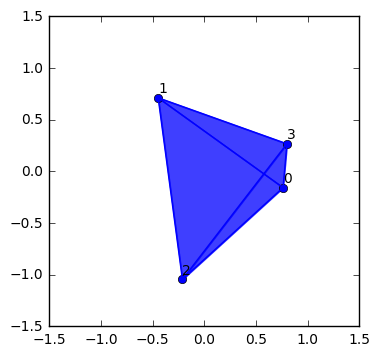

In [41]:
#computes a data set
V = np.array([[ 0.76197472, -0.15625963],[-0.44690466,  0.7130618 ],[-0.21221421, -1.04412737],
       [ 0.79934377,  0.26781564]])

#value for the largest epsilon 
eps = 3
#value for the largest dimension
k = 4

#computes the corresponding complex
obt_complex = VRcomplex(V,k,eps)
print(obt_complex)

#plots the complex
PlotVRcomplex(V,obt_complex[0])
plt.show()

#example continued below

In [8]:
#computes its bar codes
BC,Mtrans,weightsV,sortedV = BarCode(obt_complex,k)
#example continued below

sorted complex
[[0], [1], [2], [3], [0, 3], [0, 2], [1, 3], [0, 1], [2, 3], [1, 2], [0, 1, 3], [0, 2, 3], [0, 1, 2], [1, 2, 3], [0, 1, 2, 3]]
combined boundary matrix
[[ 0  0  0  0 -1 -1  0 -1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 -1  1  0 -1  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0 -1  1  0  0  0  0  0]
 [ 0  0  0  0  1  0  1  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 -1 -1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  1 -1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0 -1  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1  1  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]]
reduced combined boundary matrix
[[ 0  0  0  0 -1 -1  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0

* Given the list of simplices in the complex, and the weight of every edge, we first sort the simplices according to their weights, e.g., $[0,3]$ is the first edge because its weight is $\approx 0.4$, while $[0,1,2]$ is the first triangle because its weight is that of its longest edge, which is $\approx 1.7$.
* Then we obtain the combined boundary matrix with respect to this new ordering. For example, $[0,3]$ is the first edge appearing in column 4, and correspondingly we have $-1$ for $[0]$ and 1 for $[3]$. 
* The the reduced matrix is such that the lowest non-zero coefficient in every column of each block is at a unique row position. 
* The transformation matrix keeps track of the changes, e.g. row 4 has 1 in columns 6 and 8, reminding us that we have added column 4 to columns 6 and 8.

intervals
[[0], [1, 6], [2, 5], [3, 4], [7, 10], [8, 11], [9, 12], [13, 14]]
weights of ordered simplices
[ 0.          0.          0.          0.          0.42571855  1.31808695
  1.32339688  1.48899601  1.65663635  1.77279254  1.48899601  1.65663635
  1.77279254  1.77279254  1.77279254]


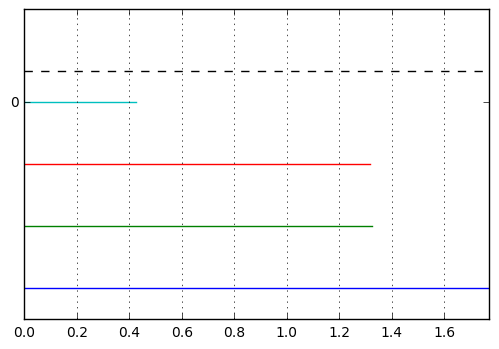

In [4]:
V = np.array([[ 0.76197472, -0.15625963],[-0.44690466,  0.7130618 ],[-0.21221421, -1.04412737],
       [ 0.79934377,  0.26781564]])

#value for the largest epsilon 
eps = 3
#value for the largest dimension
k = 4

#computes the corresponding complex
obt_complex = VRcomplex(V,k,eps)

#computes the bar codes
BC,Mtrans,weightsV,sortedV = BarCode(obt_complex,k)

print('intervals')
print(BC)

print('weights of ordered simplices')
print(weightsV)


cnt_bar =0
#plots bar codes
for i in range(0,len(BC)):
    if len(BC[i])==1:
        #add and explicit end of interval
        BC[i].append(len(obt_complex[0])-1)
    if abs(weightsV[BC[i][0]]-weightsV[BC[i][1]]) > 0.0001:
        plt.plot([weightsV[BC[i][0]],weightsV[BC[i][1]]],[cnt_bar,cnt_bar])
        #counting bars that are drawn
        cnt_bar = cnt_bar + 1
        
#plots ticks 
nb = [0]
inter = []
interln = []
ytickpos = []
yticklabel = []
cnt_tick = 0

#find indices of "born" features
idx = set(np.where(~(Mtrans-np.identity(len(Mtrans),dtype=np.int8)).any(axis=1))[0])

for i in range(1,k+1):
    nb.append(len([simplex for simplex in obt_complex[0] if len(simplex)==i]))
    inter.append(idx.intersection(range(sum(nb[0:i]),sum(nb[0:i+1]))))
    interln.append(len(inter[i-1]))
    if interln[i-1]>0:
        plt.plot([0,len(obt_complex[0])],[sum(interln[0:i])-0.5,sum(interln[0:i])-0.5],'k--')
        ytickpos.append(sum(interln[0:i])-1)
        yticklabel.append(cnt_tick)
        cnt_tick = cnt_tick + 1    
ytickpos = [x for x in ytickpos if x<= cnt_bar]
yticklabel = yticklabel[0:len(ytickpos)]
        
plt.axis([0,max(weightsV),-0.5,cnt_bar+0.5])
plt.yticks(ytickpos,yticklabel)
plt.gca().xaxis.grid(True)

plt.show()

The value [0] in intervals tells us that the simplex in column 0 did not die, while [1,6] tells us that the simplex in position 1 dies in column 6. Now which simplex is in column 6? We remember the transformation matrix that we kept. If we look at its rows which have at least one 1 above the diagonal, say row 4 has a 1 in column 6 and a 1 in column 8, this means that column 4 was added to columns 6 and 8. Now in our ordered simplex list, column 4 corresponds to $[0, 3]$, column 6 to $[1, 3]$ and column 8 to $[2, 3]$, giving that $[0,3]$ was added to both $[1,3]$ and $[2,3]$. Then similarly column 5 was added to columns 8 and 9, column 6 was added to columns 7 and 9, column 11 was added to column 14, column 12 was to added column 14, column 13 was added to column 14. We recall that the ordered simplices are $$[0], [1], [2], [3], [0, 3], [0, 2], [1, 3], [0, 1], [2, 3], [1, 2], [0, 1, 3], [0, 2, 3], [0, 1, 2], [1, 2, 3], [0, 1, 2, 3]$$. Thus we have finally for the edges:
* $[1,3] \mapsto [1,3]+[0,3]$
* $[2,3] \mapsto [2,3]+[0,3] \mapsto [2,3]+[0,2]+[0,3]$
* $[1,2] \mapsto [1,2]+[0,2] \mapsto [1,2]+[1,3]+[0,2] \mapsto [1,2]+[1,3]+[0,2]+[0,3]$
* $[0,1] \mapsto [0,1]+[1,3] \mapsto [0,1]+[1,3]+[0,3]$
which corresponds to the change of basis. Thus column 6 corresponds to $[1,3]+[0,3]$.


Finally we are left to map these intervals to values of $\epsilon$. Consider for example $[1,6]$, the means the bar starts at the first column, and stops at the 6th, that is, it starts at the simplex $[1]$, and ends at $[1,3]+[0,3]$. Now they each appear at their corresponding value of $\epsilon$, given by their weights, that is $[1]$ is already present when $\epsilon=0$, while $[1,3]+[0,3]$ has weight $\approx 1.32$ and thus appears at $\approx  1.32$.

We plot the complexes below for values of $\epsilon$ corresponding to the weights.

[0.0, 0.42571854613520821, 1.3180869451850483, 1.3233968763270565, 1.4889960053829658, 1.656636353696713, 1.7727925390429899]


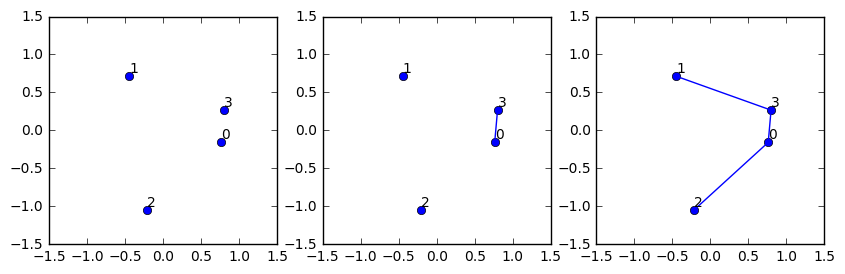

In [43]:
weight_set = sorted(list(set(weightsV)))
print(weight_set)

plt.figure(1,figsize=(10,10))
plt.subplot(131)
PlotVRcomplex(V,VRcomplex(V,2,weight_set[0])[0])
plt.subplot(132)
PlotVRcomplex(V,VRcomplex(V,2,weight_set[1]+0.1)[0])
plt.subplot(133)
PlotVRcomplex(V,VRcomplex(V,2,weight_set[3]+0.1)[0])
plt.show()

When $\epsilon=0$, we only see 4 points. When $\epsilon\approx 0.42$, the first edge appears, and when $\epsilon\approx 1.31$, the second edge appears. If we look at the bar codes above, we see 4 parallel bars until $\approx 0.42$, where one bar disappears (it is absorbed by an edge). Then we see 3 parallel bars until $\approx 1.3$, corresponding to the 3 connected components seen in the middle figure, and around $1.3$, one of these edges is absorbed by one of the components, and we are left with only 2 connected components, but one of these components is absorbed at $\approx 1.32$, so the plot does not give enough zoom to see the difference and we see the 3 components becoming one around $1.3$.

[0.0, 0.42571854613520821, 1.3180869451850483, 1.3233968763270565, 1.4889960053829658, 1.656636353696713, 1.7727925390429899]


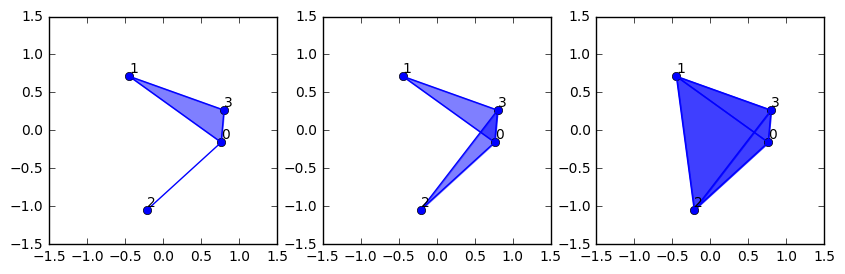

In [47]:
weight_set = sorted(list(set(weightsV)))
print(weight_set)

plt.figure(1,figsize=(10,10))
plt.subplot(131)
PlotVRcomplex(V,VRcomplex(V,3,weight_set[4]+0.1)[0])
plt.subplot(132)
PlotVRcomplex(V,VRcomplex(V,3,weight_set[5]+0.1)[0])
plt.subplot(133)
PlotVRcomplex(V,VRcomplex(V,3,weight_set[6]+0.1)[0])
plt.show()

Immediately after the 3rd component is absorbed, we see one bar left in the $H_0$ part of the graph (labelled on the $y$-axis by $0$), corresponding to one connected component. For $\epsilon \approx 1.48$, one triangles appears, and for $\epsilon \approx 1.65$, another triangle does, but both of them are boundaries of $2$-simplices, so there these are 0 in $H_1$. 

We write the plotting function for bar codes separately.

In [5]:
def PlotBarCode(BC,complex,weights,M,k):
    #take as input a barcode BC,the complex,its weights, its transformation matrix M
    
    cnt_bar =0
    #plots bar codes
    for i in range(0,len(BC)):
        if len(BC[i])==1:
            #add and explicit end of interval
            BC[i].append(len(complex[0])-1)
        if abs(weights[BC[i][0]]-weights[BC[i][1]]) > 0.0001:
            plt.plot([weights[BC[i][0]],weights[BC[i][1]]],[cnt_bar,cnt_bar])
            #counting bars that are drawn
            cnt_bar = cnt_bar + 1

    #plots ticks 
    nb = [0]
    inter = []
    interln = []
    ytickpos = []
    yticklabel = []
    cnt_tick = 0

    #find indices of "born" features
    idx = set(np.where(~(M-np.identity(len(M),dtype=np.int8)).any(axis=1))[0])

    for i in range(1,k+1):
        nb.append(len([simplex for simplex in complex[0] if len(simplex)==i]))
        inter.append(idx.intersection(range(sum(nb[0:i]),sum(nb[0:i+1]))))
        interln.append(len(inter[i-1]))
        if interln[i-1]>0:
            plt.plot([0,len(complex[0])],[sum(interln[0:i])-0.5,sum(interln[0:i])-0.5],'k--')
            ytickpos.append(sum(interln[0:i])-1)
            yticklabel.append(cnt_tick)
            cnt_tick = cnt_tick + 1    
    ytickpos = [x for x in ytickpos if x<= cnt_bar]
    yticklabel = yticklabel[0:len(ytickpos)]
    
    plt.axis([0,max(weights),-0.5,cnt_bar])
    plt.yticks(ytickpos,yticklabel)
    plt.gca().xaxis.grid(True)
    

We check the interpretation on 3 points forming the 3 vertices of a triangle.

simplices:
[[0], [1], [2], [0, 1], [0, 2], [1, 2], [0, 1, 2]]


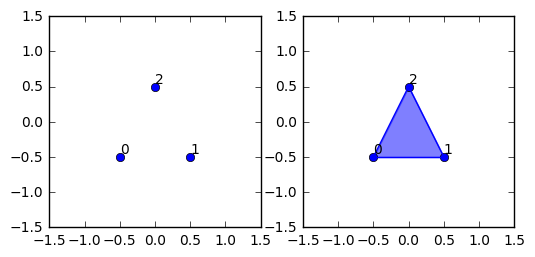

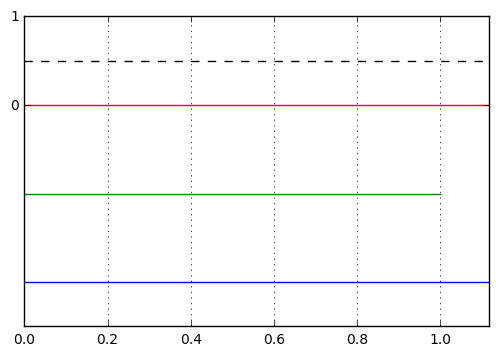

In [6]:
#computes a data set
V = np.array([[-0.5, -0.5], [0.5, -0.5], [0,0.5]])

#value for the largest epsilon 
eps = 3
#value for the largest dimension
k = 3

#computes the corresponding complex
obt_complex = VRcomplex(V,k,eps)
print('simplices:')
print(obt_complex[0])

#plots the complex
plt.subplot(121)
PlotVRcomplex(V,VRcomplex(V,k,1)[0])
plt.subplot(122)
PlotVRcomplex(V,VRcomplex(V,k,1.5)[0])
plt.show()

#computes its bar codes
BC,Mtrans,weightsV,sortedV = BarCode(obt_complex,k)

#plots the bar codes
PlotBarCode(BC,obt_complex,weightsV,Mtrans,k)
plt.show()

We see three connected compomnents corresponding to the 3 vertices.
We add more points.

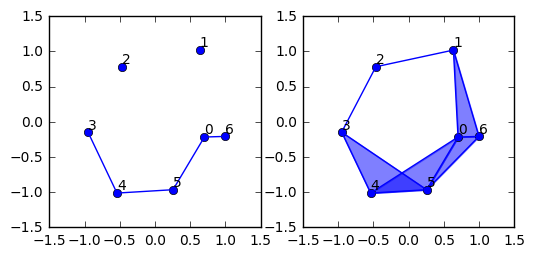

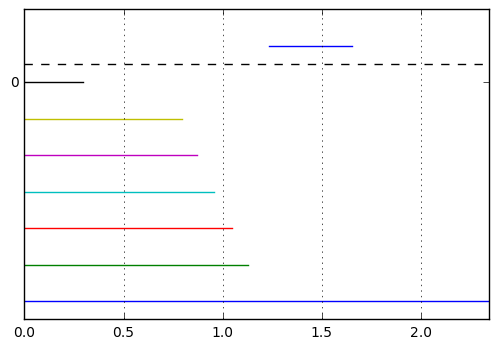

In [14]:
#computes a data set
V = np.array([[ 0.70121793, -0.21659642],
 [ 0.6359701 ,  1.01765507],
 [-0.46504607,  0.78079251],
 [-0.95040167, -0.14796332],
 [-0.53952193, -1.0121423 ],
 [ 0.25598504, -0.96444383],
 [ 0.99840099, -0.20787508]])

#value for the largest epsilon 
eps = 3
#value for the largest dimension
k = 6

#computes the corresponding complex
obt_complex = VRcomplex(V,k,eps)

#plots the complex
plt.subplot(121)
PlotVRcomplex(V,VRcomplex(V,k,1)[0])
plt.subplot(122)
PlotVRcomplex(V,VRcomplex(V,k,1.5)[0])
plt.show()

#computes its bar codes
BC,Mtrans,weightsV,sortedV = BarCode(obt_complex,k)

#plots the bar codes
PlotBarCode(BC,obt_complex,weightsV,Mtrans,k)
plt.show()

This shows the persistence of the 6 vertices for $\epsilon$ from 0 to close to 1, which suggests indeed that this shape is really a set of 6 points and one edge corresponding to 2 vertices particularly close to each other. However, we also see a hole appearing for $\epsilon$ between $1.2$ and $1.7$.

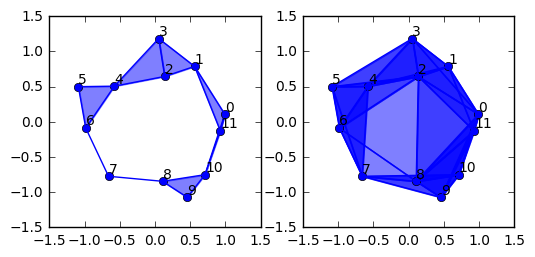

time taken in mins 1.7514129161834717


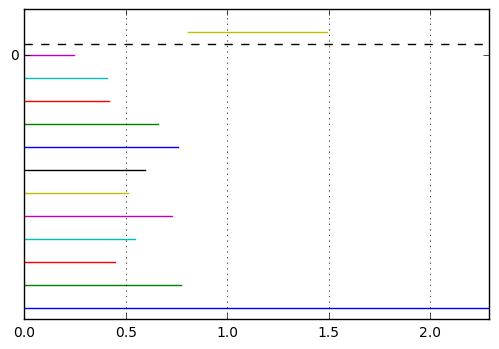

In [24]:
import time

nbpts = 12
C = np.array([np.cos(np.linspace(0,2*math.pi,nbpts)),np.sin(np.linspace(0,2*math.pi,nbpts))])
Cn = C + np.random.uniform(-0.3,0.3,(2,nbpts))
V = Cn.transpose()

#value for the largest epsilon 
eps = 3

#computes the corresponding complex
kk = 12
obt_complex = VRcomplex(V,kk,eps)

#plots the complex
k = 3
plt.subplot(121)
PlotVRcomplex(V,VRcomplex(V,k,1)[0])
plt.subplot(122)
PlotVRcomplex(V,VRcomplex(V,k,1.5)[0])
plt.show()

#tic
t = time.time()
#computes its bar codes
BC,Mtrans,weightsV,sortedV = BarCode(obt_complex,kk)
#toc 
elapsed = (time.time() - t)/60
print('time taken in mins',elapsed)

#plots the bar codes
PlotBarCode(BC,obt_complex,weightsV,Mtrans,kk)
plt.show()


We see that among the 12 vertices, 4 are absorbed by edges at a value of $\epsilon$ less than $0.5$, so the shape looks like 8 connected components around $\epsilon \approx 0.5$. We also see the appearance of a hole, for a length of $\epsilon$ which is more than 0.5.

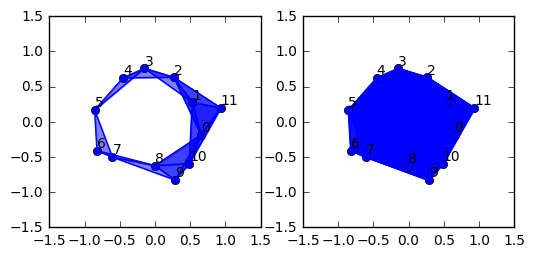

time taken in mins 1.6651741067568462


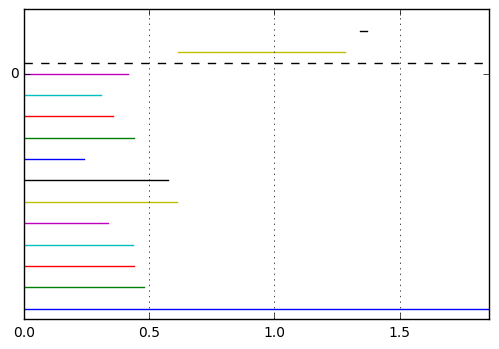

In [7]:
import time

nbpts = 12
C = np.array([0.8*np.cos(np.linspace(0,2*math.pi,nbpts)),0.8*np.sin(np.linspace(0,2*math.pi,nbpts))])
Cn = C + np.random.uniform(-0.2,0.2,(2,nbpts))
V = Cn.transpose()

#value for the largest epsilon 
eps = 3

#computes the corresponding complex
obt_complex = VRcomplex(V,nbpts,eps)

#plots the complex
k = 3
plt.subplot(121)
PlotVRcomplex(V,VRcomplex(V,k,1)[0])
plt.subplot(122)
PlotVRcomplex(V,VRcomplex(V,k,1.5)[0])
plt.show()

#tic
t = time.time()
#computes its bar codes
BC,Mtrans,weightsV,sortedV = BarCode(obt_complex,nbpts)
#toc 
elapsed = (time.time() - t)/60
print('time taken in mins',elapsed)

#plots the bar codes
PlotBarCode(BC,obt_complex,weightsV,Mtrans,nbpts)
plt.show()


We just considered a similar scenario as above, with the same number of points, only the radius of the noisy circle is slighlty smaller. As a result, we notice a higher persistence of the hole, suggesting this shape is close to be a circle. 

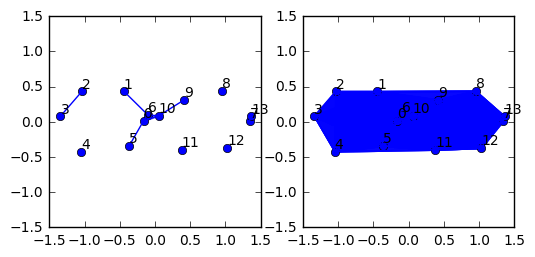

time taken in mins 74.11945887406667


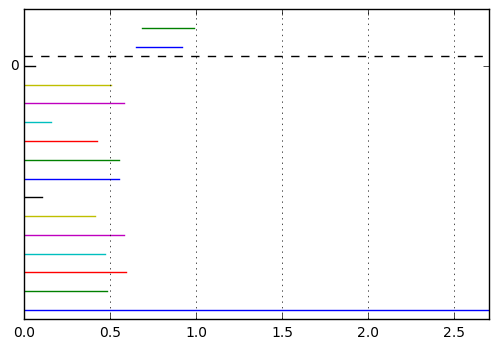

In [6]:
import time

nbpts = 14
xcoord = np.hstack([-0.7+0.6*np.cos(np.linspace(0,2*math.pi,nbpts/2)),0.7+0.6*np.cos(np.linspace(0,2*math.pi,nbpts/2))])
ycoord = np.hstack([0.4*np.sin(np.linspace(0,2*math.pi,nbpts/2)),0.4*np.sin(np.linspace(0,2*math.pi,nbpts/2))])

C = np.array([xcoord,ycoord])
              

Cn = C + np.random.uniform(-0.1,0.1,(2,nbpts))
V = Cn.transpose()

#value for the largest epsilon 
eps = 3

#computes the corresponding complex
obt_complex = VRcomplex(V,nbpts,eps)

#plots the complex
k = 3
plt.subplot(121)
PlotVRcomplex(V,VRcomplex(V,k,0.5)[0])
plt.subplot(122)
PlotVRcomplex(V,VRcomplex(V,k,1.5)[0])
plt.show()

#tic
t = time.time()
#computes its bar codes
BC,Mtrans,weightsV,sortedV = BarCode(obt_complex,nbpts)
#toc 
elapsed = (time.time() - t)/60
print('time taken in mins',elapsed)

#plots the bar codes
PlotBarCode(BC,obt_complex,weightsV,Mtrans,nbpts)
plt.show()

We observe one connected component that persists, but also two short bars in $H_1$, which captures the two holes corresponding to the two noisy circles. Everything seems to be working as it should, though the time taken to compute this is terrible. We try to see why.

In [9]:
import profile 
V = np.array([[ 1.16508412, -0.14546559],
       [ 0.86344447,  0.6411075 ],
       [ 0.15182166,  0.72103331],
       [-0.20763822,  1.15328936],
       [-1.20233783,  0.14636805],
       [-1.22126355, -0.17271477],
       [-0.45827422, -0.94028314],
       [ 0.29822157, -1.22591029],
       [ 0.57870246, -0.41342032],
       [ 0.74158809,  0.03530509]])

#value for the largest epsilon 
eps = 3
nbpts = 10

#computes the corresponding complex
obt_complex = VRcomplex(V,nbpts,eps)

profile.run('BarCode(obt_complex,nbpts)')


         2751781 function calls in 10.400 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
     1023    0.002    0.000    0.002    0.000 :0(append)
        1    0.000    0.000   10.400   10.400 :0(exec)
       10    0.000    0.000    0.000    0.000 :0(extend)
       20    0.000    0.000    0.000    0.000 :0(hasattr)
     5621    0.030    0.000    0.030    0.000 :0(index)
   870823    0.994    0.000    0.994    0.000 :0(len)
   510355    1.588    0.000    1.588    0.000 :0(max)
  1358647    3.566    0.000    3.566    0.000 :0(nonzero)
        1    0.000    0.000    0.000    0.000 :0(setprofile)
       20    0.001    0.000    0.001    0.000 :0(sorted)
       38    0.000    0.000    0.000    0.000 :0(sum)
       22    0.000    0.000    0.000    0.000 :0(zeros)
       10    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:996(_handle_fromlist)
        9    0.022    0.002    0.068    0.008 <ipython-input-2-f8a4bed59

We see that most of the time is used in computing length, max and nonzero. In the next part, we will work on optimizing this and in understanding better the input parameteres.

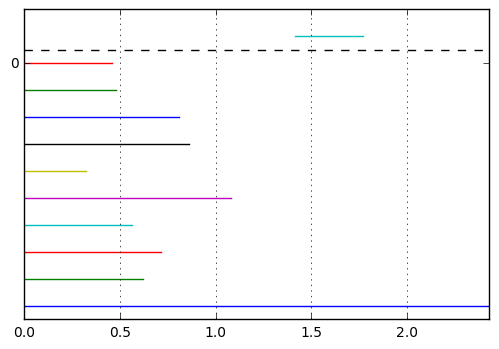

In [10]:
BC,Mtrans,weightsV,sortedV = BarCode(obt_complex,nbpts)

PlotBarCode(BC,obt_complex,weightsV,Mtrans,nbpts)
plt.show()